# imports

In [1]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'png' #retina
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv("Ames_Housing_Data.csv")

# change features name to lowercase and spaces to underscore, edited to ease during deployment and convenient sake

In [3]:
# Make column labels lowercase
df.columns = map(str.lower, df.columns)

# Replace spaces in columns with underscore
df.columns = df.columns.str.replace('\s+', '_')

In [4]:
df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
print('Data: \n')
print("Number of columns: "+ str(df.shape[1]))
print("Number of rows: "+ str(df.shape[0]))

Data: 

Number of columns: 81
Number of rows: 2930


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2930 non-null   int64  
 1   ms_subclass      2930 non-null   int64  
 2   ms_zoning        2930 non-null   object 
 3   lot_frontage     2440 non-null   float64
 4   lot_area         2930 non-null   int64  
 5   street           2930 non-null   object 
 6   alley            198 non-null    object 
 7   lot_shape        2930 non-null   object 
 8   land_contour     2930 non-null   object 
 9   utilities        2930 non-null   object 
 10  lot_config       2930 non-null   object 
 11  land_slope       2930 non-null   object 
 12  neighborhood     2930 non-null   object 
 13  condition_1      2930 non-null   object 
 14  condition_2      2930 non-null   object 
 15  bldg_type        2930 non-null   object 
 16  house_style      2930 non-null   object 
 17  overall_qual  

In [7]:
df['saleprice'].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

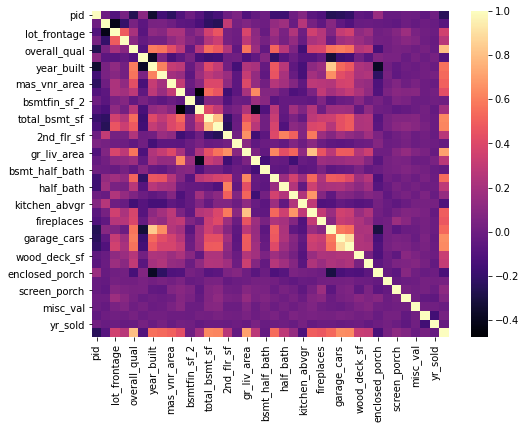

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="magma");

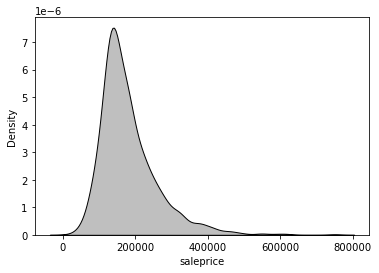

In [9]:
sns.kdeplot(x='saleprice',data=df,color='black',fill=True,);

# right skew data, not normal distribution

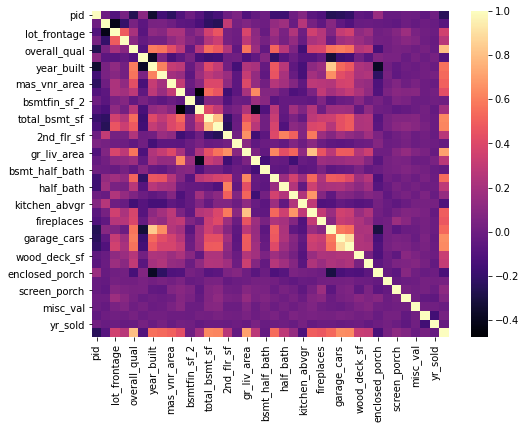

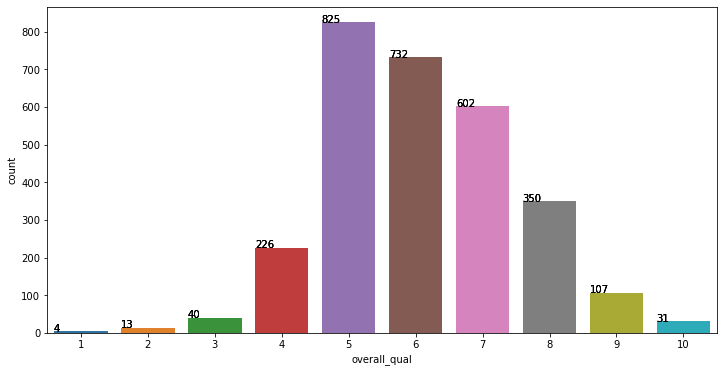

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="magma");

plt.figure(figsize=(12,6))

ax=sns.countplot(x='overall_qual',data=df)

for p in ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt);sns.kdeplot(x='saleprice',data=df,color='black',fill=True,);

# right skew data, not normal distributionplt.figure(figsize=(12,6))

ax=sns.countplot(x='overall_qual',data=df)

for p in ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt);

In [ ]:
# Kernel Density Plot
sns.distplot(df.saleprice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['saleprice']);

print("skewness: %f" % df['saleprice'].skew());

In [ ]:
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.show()

In [ ]:
#since it is right skewed we will use log transformation
#https://gdcoder.com/when-why-to-use-log-transformation-in-regression/


In [ ]:
#df.corr()['SalePrice'].sort_values()
a =df.corr()['saleprice'].sort_values(ascending =False).head(10)

print(a)
#print(df.info())

In [ ]:
#how do we plan to fix skewness?
#remove all outliers or using sqrt/log/box cox
#https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0

In [ ]:
#features with categorical dont touch!!
#features with numerical, or ordinal..yes ..try check

# fixing outliers

In [ ]:
sns.boxplot(x='saleprice',data=df);

In [ ]:
#overall_qual
#doesnt make sense to remove any of the data!!

#box plot overallqual/saleprice
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='overall_qual',y='saleprice')
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='overall_qual',y='saleprice',data=df)

In [ ]:
#gr_liv_area
plt.figure(figsize=(20,10),dpi=90)
sns.displot(df['gr_liv_area'],kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='gr_liv_area',y='saleprice',data=df)

In [ ]:
#remove using visual aid
df = df.drop(df[(df['gr_liv_area']>4000) & (df['gr_liv_area']<400000)].index)

In [ ]:
#garage_cars
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='garage_cars',y='saleprice')
plt.show()



In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_cars',y='saleprice',data=df)

In [ ]:
#garage_area
plt.figure(figsize=(20,10),dpi=90)
sns.displot(df['garage_area'],kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_area',y='saleprice',data=df)
plt.show()

In [ ]:
#remove using visual aid
df = df.drop(df[(df['garage_area']>1200)].index)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_area',y='saleprice',data=df)
plt.show()

In [ ]:
#total_bsmt_sf
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_bsmt_sf',y='saleprice',data=df)
plt.show()

In [ ]:
#1st_flr_sf 
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st_flr_sf',y='saleprice',data=df)
plt.show()

In [ ]:
#remove using visual aid
df = df.drop(df[(df['1st_flr_sf']>3500)].index)

In [ ]:
#after
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st_flr_sf',y='saleprice',data=df)
plt.show()

In [ ]:
#year_built
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='year_built',y='saleprice')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#full_bath
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='full_bath',y='saleprice')
plt.show()

In [ ]:
sns.scatterplot(x='full_bath',y='saleprice',data=df);

In [ ]:
df.index[df['full_bath']==1.0] & df.index[df['saleprice']<10.0]

df.loc[[181,1553]]

df.drop([181,1553],axis=0,inplace=True)

In [ ]:
df.index[df['full_bath']==0] & df.index[df['saleprice']>300000]

df.drop([2522],axis=0,inplace=True)

In [ ]:
#year_remod/add
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='year_remod/add',y='saleprice')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

# fixing skewness

In [ ]:
#log transform the data saleprice
#df["saleprice"] = np.log1p(df["saleprice"])

In [ ]:
sns.rugplot(x='saleprice',data=df,height=0.5);

In [ ]:
df['saleprice'].skew()

In [ ]:
df["saleprice"] = np.log1p(df["saleprice"])

In [ ]:
df['saleprice'].skew()

In [ ]:
# Kernel Density Plot

sns.distplot(df.saleprice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['saleprice']);

print("skewness: %f" % df['saleprice'].skew());




In [ ]:
fig = plt.figure()
res = stats.probplot(df['saleprice'], plot=plt)
plt.show()

# save the model

In [ ]:
df.to_csv('cs1_part1_res.csv',index=False)